In [ ]:
import pandas as pds
import numpy as np
import os

In [ ]:
# image masks zip
!wget https://dataverse.harvard.edu/api/access/datafile/3838943
os.rename('3838943', 'maks_imgs')

!mkdir masks
!unzip maks_imgs -d /content/masks

Streaming output truncated to the last 5000 lines.
  inflating: /content/masks/HAM10000_segmentations_lesion_tschandl/ISIC_0028507_segmentation.png  
  inflating: /content/masks/HAM10000_segmentations_lesion_tschandl/ISIC_0028704_segmentation.png  
  inflating: /content/masks/HAM10000_segmentations_lesion_tschandl/ISIC_0031483_segmentation.png  
  inflating: /content/masks/HAM10000_segmentations_lesion_tschandl/ISIC_0028539_segmentation.png  
  inflating: /content/masks/HAM10000_segmentations_lesion_tschandl/ISIC_0032211_segmentation.png  
  inflating: /content/masks/HAM10000_segmentations_lesion_tschandl/ISIC_0025244_segmentation.png  
  inflating: /content/masks/HAM10000_segmentations_lesion_tschandl/ISIC_0027992_segmentation.png  
  inflating: /content/masks/HAM10000_segmentations_lesion_tschandl/ISIC_0025079_segmentation.png  
  inflating: /content/masks/HAM10000_segmentations_lesion_tschandl/ISIC_0031666_segmentation.png  
  inflating: /content/masks/HAM10000_segmentations_lesion_

In [ ]:
# images zip 1
!wget https://dataverse.harvard.edu/api/access/datafile/3172585
os.rename('3172585', 'imgs_1')

!mkdir imgs
!unzip imgs_1 -d /content/imgs

# images zip 2
!wget https://dataverse.harvard.edu/api/access/datafile/3172584
os.rename('3172584', 'imgs_2')

!unzip imgs_2 -d /content/imgs

Streaming output truncated to the last 5000 lines.
  inflating: /content/imgs/ISIC_0029321.jpg  
  inflating: /content/imgs/ISIC_0029322.jpg  
  inflating: /content/imgs/ISIC_0029323.jpg  
  inflating: /content/imgs/ISIC_0029324.jpg  
  inflating: /content/imgs/ISIC_0029325.jpg  
  inflating: /content/imgs/ISIC_0029326.jpg  
  inflating: /content/imgs/ISIC_0029327.jpg  
  inflating: /content/imgs/ISIC_0029328.jpg  
  inflating: /content/imgs/ISIC_0029329.jpg  
  inflating: /content/imgs/ISIC_0029330.jpg  
  inflating: /content/imgs/ISIC_0029331.jpg  
  inflating: /content/imgs/ISIC_0029332.jpg  
  inflating: /content/imgs/ISIC_0029333.jpg  
  inflating: /content/imgs/ISIC_0029334.jpg  
  inflating: /content/imgs/ISIC_0029335.jpg  
  inflating: /content/imgs/ISIC_0029336.jpg  
  inflating: /content/imgs/ISIC_0029337.jpg  
  inflating: /content/imgs/ISIC_0029338.jpg  
  inflating: /content/imgs/ISIC_0029339.jpg  
  inflating: /content/imgs/ISIC_0029340.jpg  
  inflating: /content/imgs/IS

In [ ]:
mask_img_list = os.listdir('/content/masks/HAM10000_segmentations_lesion_tschandl')
df_mask_images = pds.DataFrame(mask_img_list, columns=['image_id'])

print('size: ', df_mask_images.size)
df_mask_images.head(10)

size:  10015


,image_id
0,ISIC_0025607_segmentation.png
1,ISIC_0025136_segmentation.png
2,ISIC_0027553_segmentation.png
3,ISIC_0026531_segmentation.png
4,ISIC_0024800_segmentation.png
5,ISIC_0031472_segmentation.png
6,ISIC_0026872_segmentation.png
7,ISIC_0028905_segmentation.png
8,ISIC_0024453_segmentation.png
9,ISIC_0029322_segmentation.png


In [ ]:
img_list = os.listdir('/content/imgs/')
df_images = pds.DataFrame(img_list, columns=['image_id'])

print('size: ', df_images.size)
df_images.head(10)

size:  10015


,image_id
0,ISIC_0026043.jpg
1,ISIC_0026631.jpg
2,ISIC_0029605.jpg
3,ISIC_0028834.jpg
4,ISIC_0024546.jpg
5,ISIC_0026203.jpg
6,ISIC_0033311.jpg
7,ISIC_0032222.jpg
8,ISIC_0025412.jpg
9,ISIC_0027678.jpg


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import os
import tqdm
import skimage.io
import glob
import tensorflow as tf
from tqdm import tqdm
import re
import cv2
import random
from skimage.io import imread, imshow
from skimage.transform import resize
import PIL
from sklearn.utils import shuffle

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

%matplotlib inline

**Bad Report Images**

In [ ]:
img_bad = []
mask_bad = []
not_found_imgs = []

start_val = 24306

i=start_val + 1
l = glob.glob('/content/masks/HAM10000_segmentations_lesion_tschandl/ISIC_*_segmentation.png')
print(len(l))
size = start_val + 1000
while i <= size:
# while i <= len(l):
  num = str(i)
  zeroes = 7 - len(num)
  mask=cv2.imread('/content/masks/HAM10000_segmentations_lesion_tschandl/ISIC_' + zeroes * "0" + str(i) + '_segmentation.png')
  if type(mask) is np.ndarray:
    mask = cv2.resize(mask, (128, 128))
    mask_bad.append(mask)
  else:
    not_found_imgs.append(i)

  img = cv2.imread('/content/imgs/ISIC_' + zeroes * "0" + str(i) + '.jpg')
  if type(img) is np.ndarray:
    img = cv2.resize(img, (128, 128))
    img_bad.append(img)
    print(i)
  i+=1
mask_bad = np.array(mask_bad)
img_bad = np.array(img_bad)
print(len(img_bad))
print("Completed")

print("Images Not Found:", not_found_imgs)

10015
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
24325
24326
24327
24328
24329
24330
24331
24332
24333
24334
24335
24336
24337
24338
24339
24340
24341
24342
24343
24344
24345
24346
24347
24348
24349
24350
24351
24352
24353
24354
24355
24356
24357
24358
24359
24360
24361
24362
24363
24364
24365
24366
24367
24368
24369
24370
24371
24372
24373
24374
24375
24376
24377
24378
24379
24380
24381
24382
24383
24384
24385
24386
24387
24388
24389
24390
24391
24392
24393
24394
24395
24396
24397
24398
24399
24400
24401
24402
24403
24404
24405
24406
24407
24408
24409
24410
24411
24412
24413
24414
24415
24416
24417
24418
24419
24420
24421
24422
24423
24424
24425
24426
24427
24428
24429
24430
24431
24432
24433
24434
24435
24436
24437
24438
24439
24440
24441
24442
24443
24444
24445
24446
24447
24448
24449
24450
24451
24452
24453
24454
24455
24456
24457
24458
24459
24460
24461
24462
24463
24464
24465
24466
24467
24468
24469
24470
24471
2447

In [ ]:
def RGBimshow(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)

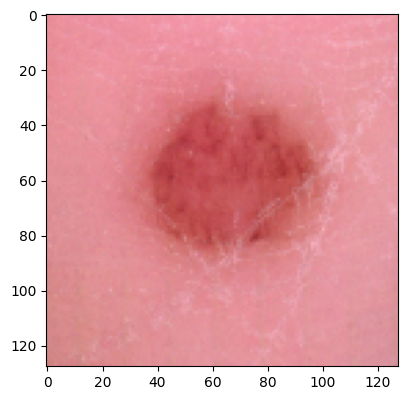

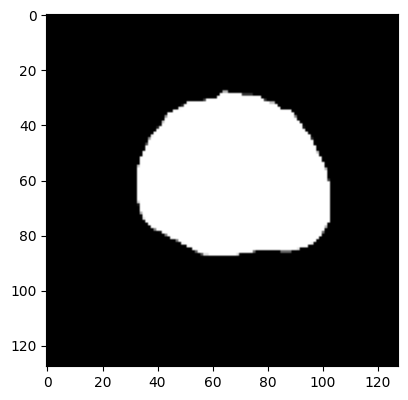

In [ ]:
i=135
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(1)
plt.subplot(1,2,1)
RGBimshow(img_bad[i])
plt.figure(2)
plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(mask_bad[i])

**model**

In [ ]:
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from tensorflow.keras.layers import Concatenate, MaxPooling2D, Lambda,Input, MaxPool2D, Dense, BatchNormalization, LeakyReLU, Conv2D, UpSampling2D, Reshape, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from keras import backend as K
from tensorflow.keras.layers import Convolution2DTranspose, UpSampling2D, Dropout, Conv2DTranspose

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K

def repeat_elem(tensor, rep):
    # lambda function to repeat Repeats the elements of a tensor along an axis by a factor of rep.
    # If tensor has shape (None, 256,256,3), lambda will return a tensor of shape (None, 256,256,6), if specified axis=3 and rep=2.

     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)

def res_conv_block(x, filter_size, size, dropout, batch_norm=False):

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv) #axis=3 parameter specifies that batch normalization should be applied along the channel axis. In a 2D convolutional layer, the channels correspond to the depth dimension
    #conv = layers.Activation('relu')(conv)    #Activation before addition with shortcut
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
    if batch_norm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)

    res_path = layers.add([shortcut, conv])
    res_path = layers.Activation('relu')(res_path)    #Activation after addition with shortcut (Original residual block)
    return res_path

def gating_signal(input, out_size, batch_norm=False):
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x
#generates spatial channel wise information to generate attention weights, which are then used to modulate the input tensor
def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

    phi_g = layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3), strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]), padding='same')(phi_g)  # 16

    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

    upsample_psi = repeat_elem(upsample_psi, shape_x[3])

    y = layers.multiply([upsample_psi, x])

    result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = layers.BatchNormalization()(result)
    return result_bn

def encoder_block(inputs, filter_size, filter_num, dropout_rate, batch_norm):
    conv = res_conv_block(inputs, filter_size, filter_num, dropout_rate, batch_norm)
    pool = layers.MaxPooling2D(pool_size=(2,2))(conv)
    return conv, pool

def decoder_block(input, conv, filter_size, filter_num, dropout_rate, batch_norm, up_samp_size, axis):
    gating = gating_signal(input, filter_num, batch_norm)
    att = attention_block(conv, gating, filter_num)
    up = layers.UpSampling2D(size=(up_samp_size, up_samp_size), data_format="channels_last")(input)
    up = layers.concatenate([up, att], axis=axis)
    up_conv = res_conv_block(up, filter_size, filter_num, dropout_rate, batch_norm)
    return up_conv

def Attention_Res_UNet(input_shape, NUM_CLASSES=1, dropout_rate=0.0, batch_norm=True):

    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters
    # input data
    # dimension of the image depth
    inputs = layers.Input(input_shape, dtype=tf.float32)
    axis = 3

    # Downsampling layers (Encoder Block)
    conv_128, pool_64 = encoder_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    conv_64, pool_32 = encoder_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    conv_32, pool_16 = encoder_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    conv_16, pool_8 = encoder_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)

    conv_8 = res_conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers (Decoder Block)
    up_conv_16 = decoder_block(conv_8, conv_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm, UP_SAMP_SIZE, axis)
    up_conv_32 = decoder_block(up_conv_16, conv_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm, UP_SAMP_SIZE, axis)
    up_conv_64 = decoder_block(up_conv_32, conv_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm, UP_SAMP_SIZE, axis)
    up_conv_128 = decoder_block(up_conv_64, conv_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm, UP_SAMP_SIZE, axis)

    # 1*1 convolutional layers
    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=axis)(conv_final)
    conv_final = layers.Activation('sigmoid')(conv_final)  # Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="AttentionResUNet")
    return model

In [ ]:
input_shape = (128,128,3)
model = Attention_Res_UNet(input_shape)
model.summary()

Model: "AttentionResUNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 64)         0         ['batch_normali

**Training**

In [ ]:
s=max([img_bad.shape[0]])
img=[]
mask=[]
y = []
for i in range(s):
  try:
    img.append(img_bad[i])
    mask.append(mask_bad[i][:, :, 0:1])
    y.append([0, 1, 0])
  except:
    pass
img = np.array(img)
mask = np.array(mask)
mask = mask.astype(bool)
y = np.array(y)

In [ ]:
mask.shape

(1000, 128, 128, 1)

In [ ]:
from tensorflow import keras

In [ ]:
call= tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience =5, restore_best_weights= True)

In [ ]:
arr=[]
class CustomCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    #prediction = self.model.predict(np.reshape(img[1:2], (1, 128, 128)))
    arr.append(self.predict(img[1:2].reshape(128,128)))

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x=img, y=mask, epochs = 50)

Epoch 1/50
32/32 [==============================] - 89s 962ms/step - loss: 0.4492 - accuracy: 0.8589
Epoch 2/50
32/32 [==============================] - 22s 676ms/step - loss: 0.3339 - accuracy: 0.9085
Epoch 3/50
32/32 [==============================] - 22s 678ms/step - loss: 0.2804 - accuracy: 0.9188
Epoch 4/50
32/32 [==============================] - 22s 679ms/step - loss: 0.2390 - accuracy: 0.9282
Epoch 5/50
32/32 [==============================] - 22s 684ms/step - loss: 0.2261 - accuracy: 0.9261
Epoch 6/50
32/32 [==============================] - 22s 690ms/step - loss: 0.2024 - accuracy: 0.9345
Epoch 7/50
32/32 [==============================] - 22s 692ms/step - loss: 0.1948 - accuracy: 0.9338
Epoch 8/50
32/32 [==============================] - 22s 693ms/step - loss: 0.1869 - accuracy: 0.9359
Epoch 9/50
32/32 [==============================] - 22s 694ms/step - loss: 0.1766 - accuracy: 0.9385
Epoch 10/50
32/32 [==============================] - 22s 697ms/step - loss: 0.1765 - accura

In [ ]:
def maskArea(img):
  DPI = 72
  INCH_TO_CM = 2.54
  sum_of_pixels = (img.sum() / 255)
  img_area = ((1 / DPI) ** 2) * (INCH_TO_CM ** 2) * sum_of_pixels
  return img_area
def area(img):
  DPI = 72
  INCH_TO_CM = 2.54
  sum_of_pixels = img.sum()
  img_area = ((1 / DPI) ** 2) * (INCH_TO_CM ** 2) * sum_of_pixels
  return img_area

1/1 [==============================] - 3s 3s/step


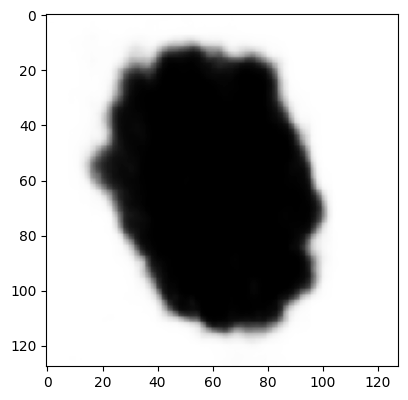

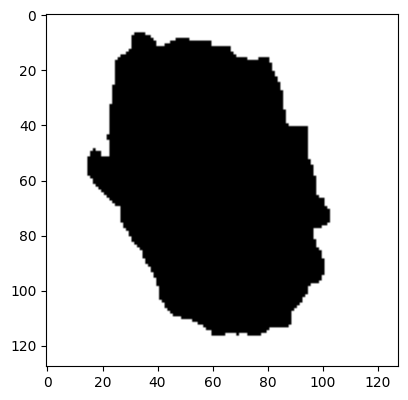

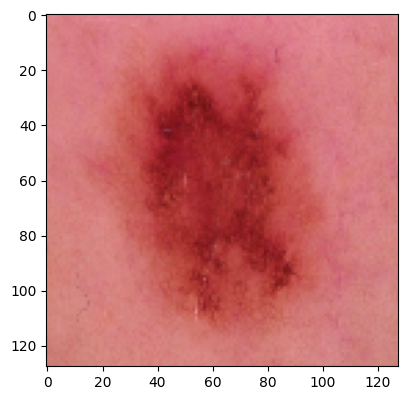

In [ ]:
i=55
img_test_1=model.predict(img[i:i+1]).reshape(128,128)
plt.figure(1)
plt.subplot(122)
plt.imshow(img_test_1, cmap=plt.cm.binary)
plt.figure(2)
plt.subplot(122)
plt.imshow(mask[i].reshape(128,128), cmap=plt.cm.binary)
plt.figure(3)
plt.subplot(122)
RGBimshow(img[i])

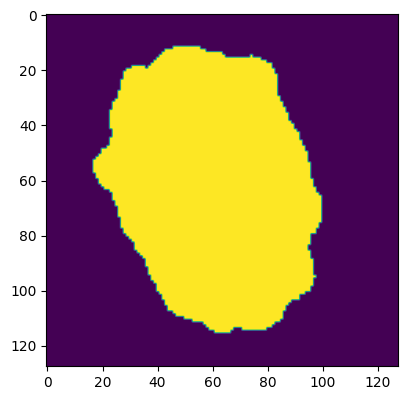

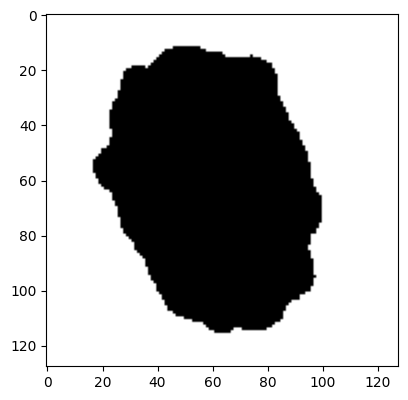

In [ ]:
img_test_2 = (img_test_1 >= 0.5)
plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(img_test_2)
plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(img_test_2, cmap=plt.cm.binary)

**Some sample results using the model**

1/1 [==============================] - 0s 28ms/step
area of pred image:  4.105676774691358 sq cm
area of mask image:  4.12239728848947 sq cm


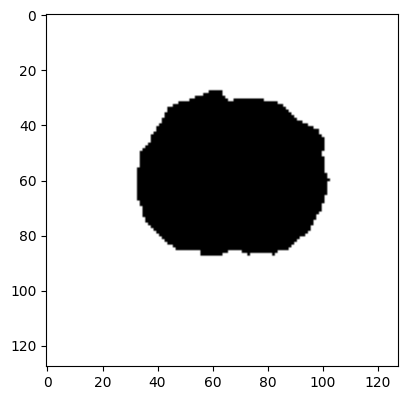

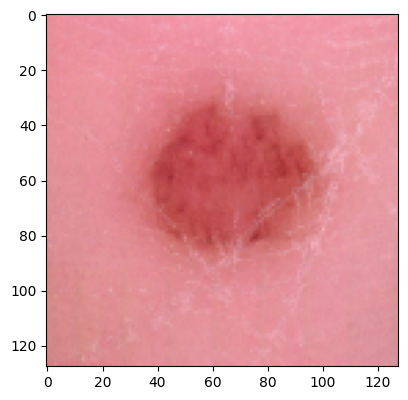

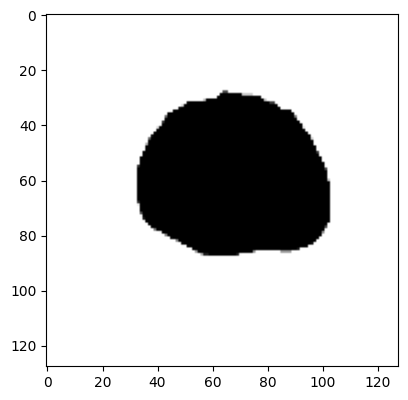

In [ ]:
i = 135

img_pred = model.predict(img[i:i+1]).reshape(128,128)
img_pred = (img_pred >= 0.5)

plt.figure(1)
plt.subplot(122)
plt.imshow(img_pred, cmap=plt.cm.binary)
img_pred_area = area(img_pred)
print('area of pred image: ', img_pred_area, 'sq cm')
plt.figure(2)
plt.subplot(122)
RGBimshow(img[i])
plt.figure(3)
plt.subplot(122)
plt.imshow(mask_bad[i][:, :, 0].reshape(128,128), cmap=plt.cm.binary)
mask_area = maskArea(mask_bad[i][:, :, 0])
print('area of mask image: ', mask_area, 'sq cm')

1/1 [==============================] - 0s 24ms/step
area of pred image:  2.502732947530864 sq cm
area of mask image:  2.4191059761558944 sq cm


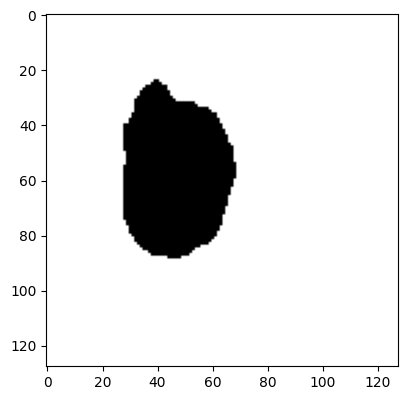

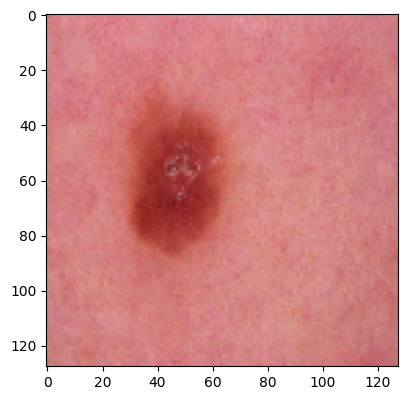

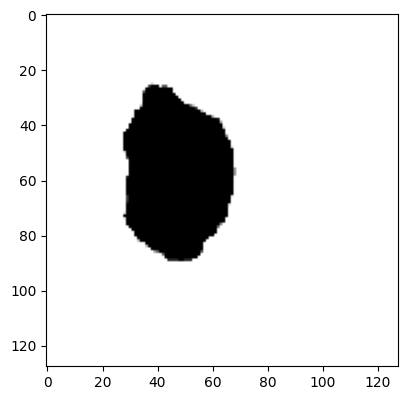

In [ ]:
i = 57

img_pred = model.predict(img[i:i+1]).reshape(128,128)
img_pred = (img_pred >= 0.5)

plt.figure(1)
plt.subplot(122)
plt.imshow(img_pred, cmap=plt.cm.binary)
img_pred_area = area(img_pred)
print('area of pred image: ', img_pred_area, 'sq cm')
plt.figure(2)
plt.subplot(122)
RGBimshow(img[i])
plt.figure(3)
plt.subplot(122)
plt.imshow(mask_bad[i][:, :, 0].reshape(128,128), cmap=plt.cm.binary)
mask_area = maskArea(mask_bad[i][:, :, 0])
print('area of mask image: ', mask_area, 'sq cm')

1/1 [==============================] - 0s 26ms/step
area of pred image:  4.339646836419753 sq cm
area of mask image:  4.606828543330912 sq cm


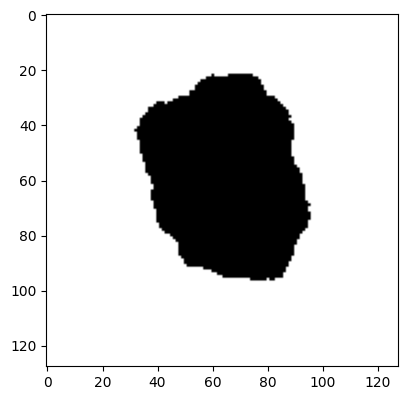

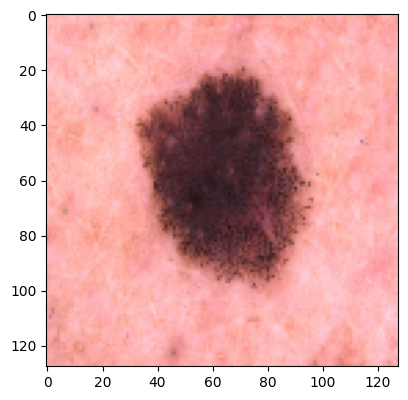

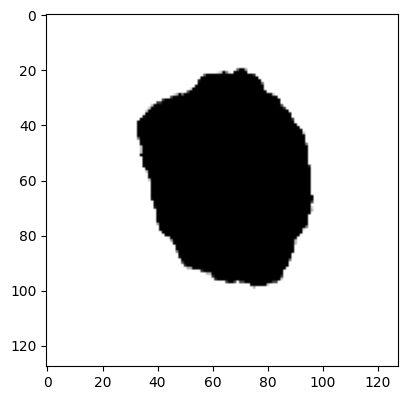

In [ ]:
i = 789

img_pred = model.predict(img[i:i+1]).reshape(128,128)
img_pred = (img_pred >= 0.5)

plt.figure(1)
plt.subplot(122)
plt.imshow(img_pred, cmap=plt.cm.binary)
img_pred_area = area(img_pred)
print('area of pred image: ', img_pred_area, 'sq cm')
plt.figure(2)
plt.subplot(122)
RGBimshow(img[i])
plt.figure(3)
plt.subplot(122)
plt.imshow(mask_bad[i][:, :, 0].reshape(128,128), cmap=plt.cm.binary)
mask_area = maskArea(mask_bad[i][:, :, 0])
print('area of mask image: ', mask_area, 'sq cm')